All code and ideas in this notebook were produced by James Lu, for the machine learning DALI challenge.

For this project, **I chose to do a simple regression to predict median GPA points of a course.**

## Exploring our data

### Everything until the next section is just me looking through the dataset. Nothing important.

Big picture: Let's first look through the data, noting the columns (aka variables) and rows (aka observations, or in this case courses). We find that our dataset has 1560 observations, and 8 variables (excluding the useless ID column on the left): `Year`, `Term Number`, `Department`, `Course Number`, `Number of Sections`, `Enrollemtns`, `Median GPA Points`, and `Average Section Size`. We also notice that the dataset is very well-organized, minus some missing values. It seems to be organized by ascending year, then term number, then department (alphabetically), then course number.

### Importing the Dataset

First read in the dataset into a pandas `DataFrame`, then display some of its values.

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data\Dartmouth - Courses.csv")
data

,Unnamed: 0,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
0,0,NaN,NaN,AAAS,31.10,1.0,14.0,4.000000,14.0
1,1,2021.0,3.0,AAAS,31.90,1.0,17.0,4.000000,17.0
2,2,2021.0,3.0,AAAS,60.01,1.0,19.0,3.666667,NaN
3,3,2021.0,3.0,AAAS,62.75,1.0,29.0,4.000000,29.0
4,4,2021.0,3.0,AAAS,65.65,1.0,16.0,3.333333,16.0
...,...,...,...,...,...,...,...,...,...
1555,1555,2022.0,2.0,WRIT,7.34,1.0,16.0,3.833333,16.0
1556,1556,2022.0,2.0,WRIT,7.35,1.0,16.0,4.000000,16.0
1557,1557,NaN,2.0,WRIT,7.36,1.0,16.0,3.666667,16.0
1558,1558,2022.0,2.0,WRIT,7.37,2.0,30.0,4.000000,15.0


Let's first get rid of the first column, which contains the index of each observation. I won't be using it for my code.

In [2]:
data = data.drop(columns=["Unnamed: 0"])
print(data.shape)

(1560, 8)


In [3]:
data.value_counts()

Year    Term Number  Department  Course Number  Number of Sections  Enrollments  Median GPA Points  Average Section Size
2021.0  3.0          AAAS        31.90          1.0                 17.0         4.000000           17.0                    1
2022.0  1.0          SPEE        20.01          1.0                 14.0         4.000000           14.0                    1
                     THEA        10.68          1.0                 14.0         4.000000           14.0                    1
                                 16.00          1.0                 14.0         4.000000           14.0                    1
                                 31.00          1.0                 11.0         4.000000           11.0                    1
                                                                                                                           ..
2021.0  4.0          QSS         30.16          1.0                 16.0         4.000000           16.0                   

In [4]:
data.describe()

,Year,Term Number,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,2021.623219,2.358974,34.933725,1.210114,34.990028,3.784628,26.249205
std,0.484752,1.182275,27.496488,1.332476,62.696703,0.255079,20.757721
min,2021.000000,1.000000,1.000000,1.000000,10.000000,2.666667,10.000000
25%,2021.000000,1.000000,12.000000,1.000000,15.000000,3.666667,14.000000
50%,2022.000000,2.000000,30.135000,1.000000,20.000000,4.000000,19.000000
75%,2022.000000,4.000000,52.002500,1.000000,31.000000,4.000000,30.000000
max,2022.000000,4.000000,372.000000,33.000000,1175.000000,4.000000,235.000000


In [5]:
data.loc[data["Enrollments"]>30]

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
6,2021.0,3.0,ANTH,3.00,1.0,58.0,NaN,58.0
14,2021.0,3.0,ASCL,70.18,2.0,88.0,4.000000,44.0
15,2021.0,3.0,ASTR,1.00,1.0,97.0,3.333333,97.0
16,2021.0,3.0,ASTR,2.00,NaN,62.0,4.000000,31.0
17,2021.0,3.0,BIOL,13.00,1.0,71.0,3.000000,71.0
...,...,...,...,...,...,...,...,...
1510,2022.0,2.0,SPAN,20.00,2.0,38.0,4.000000,19.0
1528,2022.0,2.0,THEA,7.01,2.0,32.0,4.000000,16.0
1530,2022.0,2.0,TUCK,3.00,2.0,124.0,3.666667,62.0
1537,2022.0,2.0,NaN,33.03,1.0,34.0,4.000000,34.0


In [6]:
# explore values for the dataset
data[:20]

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
0,NaN,NaN,AAAS,31.10,1.0,14.0,4.000000,14.0
1,2021.0,3.0,AAAS,31.90,1.0,17.0,4.000000,17.0
2,2021.0,3.0,AAAS,60.01,1.0,19.0,3.666667,NaN
3,2021.0,3.0,AAAS,62.75,1.0,29.0,4.000000,29.0
4,2021.0,3.0,AAAS,65.65,1.0,16.0,3.333333,16.0
5,2021.0,3.0,AAAS,88.19,1.0,19.0,4.000000,19.0
6,2021.0,3.0,ANTH,3.00,1.0,58.0,NaN,58.0
7,2021.0,3.0,ANTH,18.00,1.0,16.0,4.000000,16.0
8,2021.0,3.0,NaN,12.19,1.0,24.0,4.000000,24.0
9,2021.0,3.0,ARTH,17.06,1.0,21.0,3.666667,21.0


In [7]:
data[-10:]

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
1550,NaN,2.0,WRIT,41.00,1.0,NaN,NaN,20.0
1551,2022.0,2.0,WRIT,NaN,NaN,16.0,NaN,16.0
1552,NaN,NaN,WRIT,7.28,1.0,16.0,4.000000,NaN
1553,2022.0,2.0,WRIT,7.30,1.0,16.0,NaN,16.0
1554,2022.0,NaN,WRIT,7.32,1.0,16.0,3.666667,NaN
1555,2022.0,2.0,WRIT,7.34,1.0,16.0,3.833333,16.0
1556,2022.0,2.0,WRIT,7.35,1.0,16.0,4.000000,16.0
1557,NaN,2.0,WRIT,7.36,1.0,16.0,3.666667,16.0
1558,2022.0,2.0,WRIT,7.37,2.0,30.0,4.000000,15.0
1559,2022.0,2.0,WRIT,7.38,1.0,16.0,NaN,16.0


Notice that data starts in Term 3 of 2021 and ends in Term 2 of 2022:

In [8]:
data.value_counts(subset=["Year", "Term Number"])

Year    Term Number
2022.0  2.0            406
        1.0            379
2021.0  4.0            357
        3.0            125
dtype: int64

In [9]:
print("Terms in 2021 data:", 
    str(set(data["Term Number"][i] for i in range(len(data)) 
    if data["Year"][i] == 2021 and not np.isnan(data["Term Number"][i]))))
print("Terms in 2022 data:", 
    str(set(data["Term Number"][i] for i in range(len(data)) 
    if data["Year"][i] == 2022 and not np.isnan(data["Term Number"][i]))))

Terms in 2021 data: {3.0, 4.0}
Terms in 2022 data: {1.0, 2.0}


<br /><br /><br /><br /><br /><br /><br />

## The Next Section - I actually start doing stuff.

In [10]:
print("Total Points of Data: " , str(len(data)))
print("\nNumber of Null Values by Variable:")
print(data.isnull().sum()[1:])

Total Points of Data:  1560

Number of Null Values by Variable:
Term Number             156
Department              156
Course Number           156
Number of Sections      156
Enrollments             156
Median GPA Points       156
Average Section Size    156
dtype: int64


Wow, we're missing a lot of data! Each variable is missing 10% of its values!

Let's see how bad this is in a missing values matrix. The matrix shows observations on its y-axis and variables on its x-axis. Each (variable, observation) coordinate is colored white if it is missing (aka NaN) or dark grey if it is present. That's a lot of white!

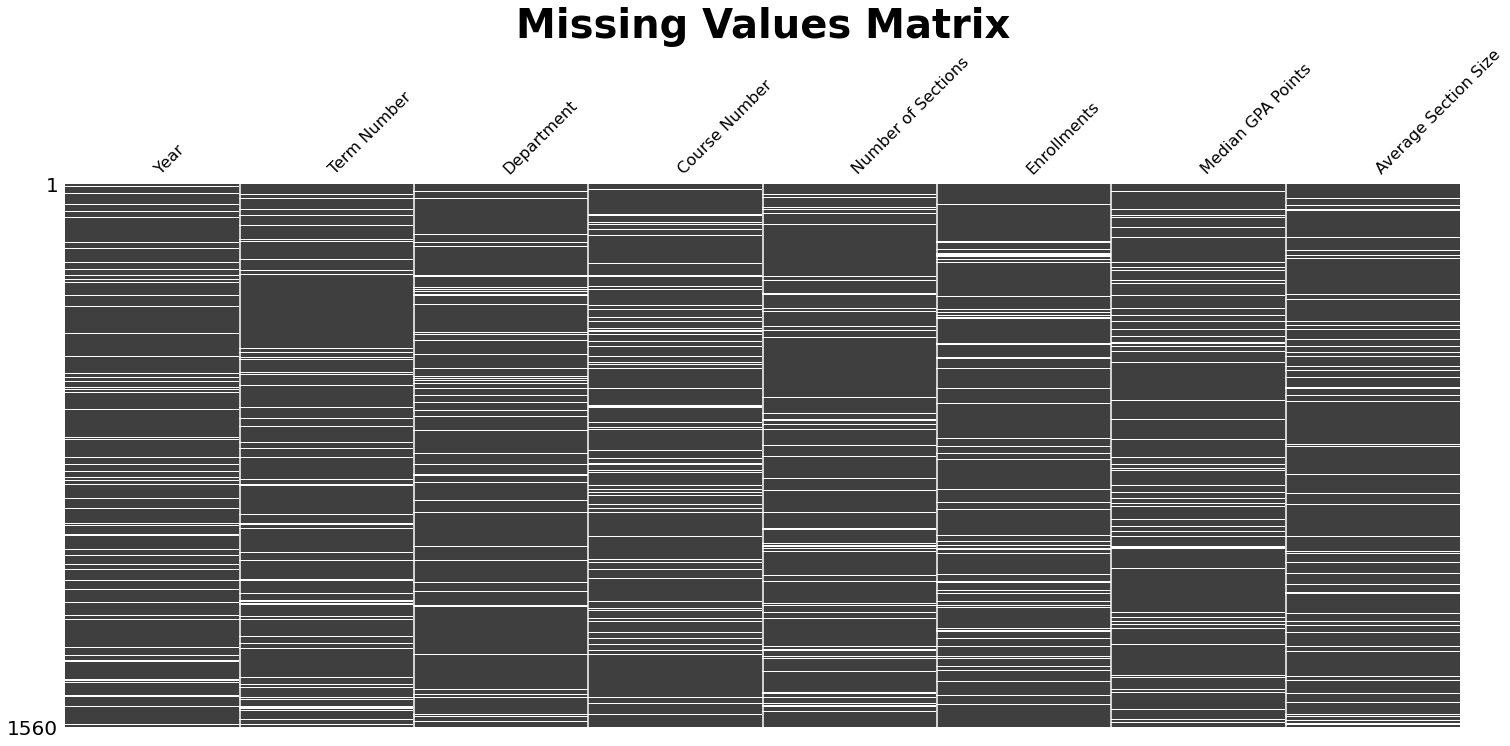

In [11]:
# explore the matrix of null values
ax0 = msno.matrix(data, sparkline=False)
ax0.set_title("Missing Values Matrix", fontsize=40, fontweight='bold');

## Data Imputation - Interpolating Missing Data Values

It looks like there are a lot of missing values - let's explore this further and see if we can fill in anything. Because the dataset is well-organized, I will assume the following:
- If a row is missing a term value, but the previous row for which a term number was defined and the next row for which a term number was defined have the same value, the missing term value is *probably* also that value. This value can be found via recursion.
    - Likewise, this is also the case for the `Department` variable, with the added caveat that `Department` variables repeat each term. Thus, we have to control the recursion such that it only returns an output if the previously defined row and next defined row have the same term number as well.
    - There is an additional check we can do for `Department`, on the assumption that course numbers within a department are listed in ascending order. So, if a row has a greater course number than the previous and next row, it definitely belongs to the same department as the previous row.

Thus, we can fill these values in.

Additionally, for rows where only one of the three following variables is unknown, we can easily calculate the unknown value, removing many null values from our dataset.
- Number of Sections
- Enrollments
- Average Section Size

Lastly, from our initial exploration, it looks like we only have data for courses in terms 3 and 4 (or nan) in 2021 and terms 1 and 2 (or nan) for 2022. I think it's safe to fill in `data[Year][i]` as 2021 if its associated term is either 3 or 4, and 2022 if otherwise.

I handle the first and last rows separately for `Term Number` and `Department`, because my recursive functions won't properly handle them. Note that the term number is missing from the first row. Based on my assumptions, I will set it equal to 3. While I'm at it, I might as well set `Year` to 2021.

Everything is filled in the last row; thus, it doesn't need to be edited.

#### Side Notes:
- Because we are working with relatively little data (~1500 observations), I'd prefer using recursion to fill in as many points as accurately as possible for the `Term Number` and `Department` variables. In a larger dataset, I'd probably fill these in using K Nearest Neighbors (n=2) rather than recursion.
- The only columns I won't fill in are `Course Number` and `Median GPA Points`. While it is possible to guess `Course Number` and `Median GPA Points` values (potentially with an average value), I think it would be unhelpful to fill in either.

In [12]:
from typing import *
import warnings
warnings.filterwarnings("ignore")


#define recursive functions to find term numbers and departments
def find_term_number(i: int, df: pd.core.frame.DataFrame, diff=1):
    
    
    
    
    #TODO: Comments
    """
    Recurisvely calls 
    
    Parameters
    ----------
    
    Returns
    ----------
    """
    prev_t = df["Term Number"][max(0,i-diff)]  # get value of previous row
    next_t = df["Term Number"][min(len(df) - 1, i+diff)]  # get value of next row

    if np.isclose(prev_t, next_t):
        # base case, set current row equal to the value of previous row if the next row also has the same value
        return prev_t
    if diff > len(df):
        # base case, exit if entire array was searched
        return None
    
    # recursive case, search one extra row below and above
    return find_term_number(i, df, diff+1)

def find_dept(i: int, df: pd.core.frame.DataFrame, diff=1):
    
    
    #TODO:COMMENTS
    
    
    prev_d = df["Department"][max(0,i-diff)]  # get value of previous row
    next_d = df["Department"][min(len(df) - 1, i+diff)]  # get value of next row
    
    if prev_d == next_d:
        # base case, set current row equal to the value of previous row if the next row also has the same value
        # AND they have the same term
        if np.isclose(df["Term Number"][max(0,i-diff)], df["Term Number"][min(len(df) - 1, i+diff)]):
            return prev_d
        else:
            return None
    if diff > len(df):
        # base case, exit if entire array was searched
        return None
    
    # recursive case, search one extra row below and above
    return find_dept(i, df, diff+1)


# Now to actually find our missing values

filled_data = data.copy()  # a copy of our dataset, in which we will fill in missing values
filled_count = len(filled_data)  # a counter for how many values we actually fill in
# NOTE that the following code affects our dataset in a way such that it is only accurate under the assumption that
# the original dataset is neatly ordered

#replace the term number and year in the first data entry, because these values are missing but easily inferred
filled_data["Term Number"][0] = 3.
filled_data["Year"][0] = 2021.
filled_count += 2

for i in range(len(filled_data)):
    # fill missing values for term numbers if we are able to
    curr_t = filled_data["Term Number"][i]

    if np.isnan(curr_t):
        t_est = find_term_number(i, filled_data)
        if t_est is not None:
            filled_data["Term Number"][i] = t_est
            filled_count += 1
    
    #fill missing values for department if we are able to
    curr_d = filled_data["Department"][i]
    
    if pd.isnull(curr_d):
        d_est = find_dept(i, filled_data)
        if d_est is not None:
            filled_data["Department"][i] = d_est
            filled_count += 1

    # fill missing values for enrollment/section data if we are able to
    ass = filled_data["Average Section Size"][i]  # no, i will not consider changing the variable name.
    enr = filled_data["Enrollments"][i]
    nos = filled_data["Number of Sections"][i]
    if np.isnan(ass) and not (np.isnan(enr) or np.isnan(nos)):
            filled_data["Average Section Size"][i] = enr / nos
    elif np.isnan(enr) and not (np.isnan(ass) or np.isnan(nos)):
            filled_data["Enrollments"][i] = ass * nos
    elif np.isnan(nos) and not (np.isnan(ass) or np.isnan(enr)):
            filled_data["Number of Sections"][i] = enr / ass
    else:
        filled_count -= 1

    # fill missing values for year, based on term number. 
    # NOTE that this only works under the assumption that 2021 contains exclusively terms 3 and 4, 
    # and 2022 contains exclusively terms 1 and 2.
    if np.isnan(filled_data["Year"][i]) and not\
        np.isnan(filled_data["Term Number"][i]):
        filled_count += 1
        if filled_data["Term Number"][i] in {1., 2.}:
            filled_data["Year"][i] = 2022.  
        else:
            filled_data["Year"][i] = 2021.

# second loop to check for the added case for departments (based on course numbers)
for i in range(1, len(filled_data) - 1):
    # get department values
    curr_d = filled_data["Department"][i]
    prev_d = filled_data["Department"][i-1]
    next_d = filled_data["Department"][i+1]
    
    if pd.isnull(curr_d) and not (pd.isnull(prev_d) or pd.isnull(next_d)):
        # get course number values
        curr_cn = filled_data["Course Number"][i]
        prev_cn = filled_data["Course Number"][i-1]
        next_cn = filled_data["Course Number"][i+1]
        if not (pd.isnull(curr_cn) or pd.isnull(prev_cn) or pd.isnull(next_cn)):
            if curr_cn > prev_cn and curr_cn > next_cn:
                filled_data["Department"][i] = prev_d
                filled_count += 1
            elif curr_cn < prev_cn and curr_cn < next_cn:
                filled_data["Department"][i] = next_d
                filled_count += 1
        
        

    
print("Total Points of Data: " , str(len(filled_data)))
print("\nNumber of Null Values by Variable, After Filling:")
print(filled_data.isnull().sum())
print("\nFilled " + str(filled_count) + " nan values!")

Total Points of Data:  1560

Number of Null Values by Variable, After Filling:
Year                      0
Term Number               0
Department               33
Course Number           156
Number of Sections       31
Enrollments              30
Median GPA Points       156
Average Section Size     30
dtype: int64

Filled 812 nan values!


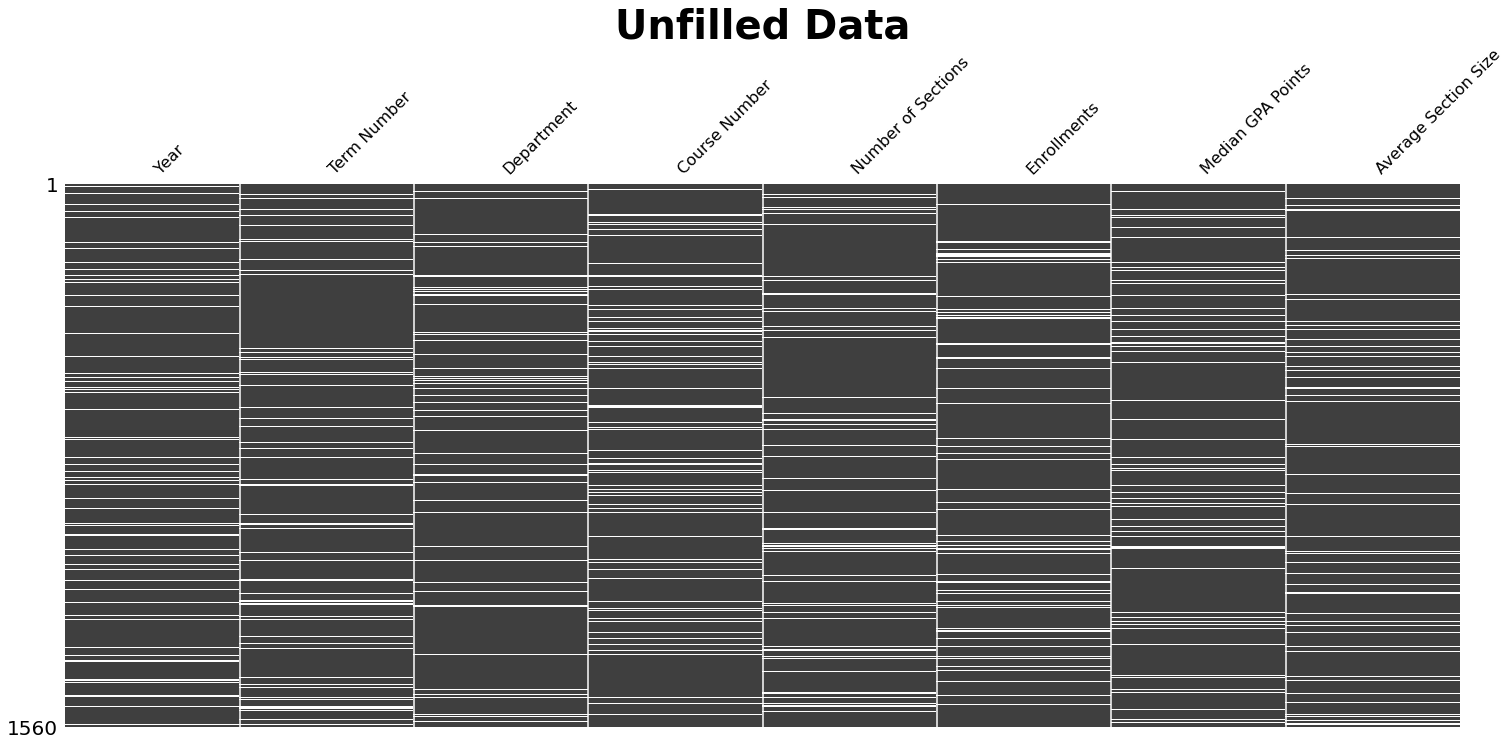

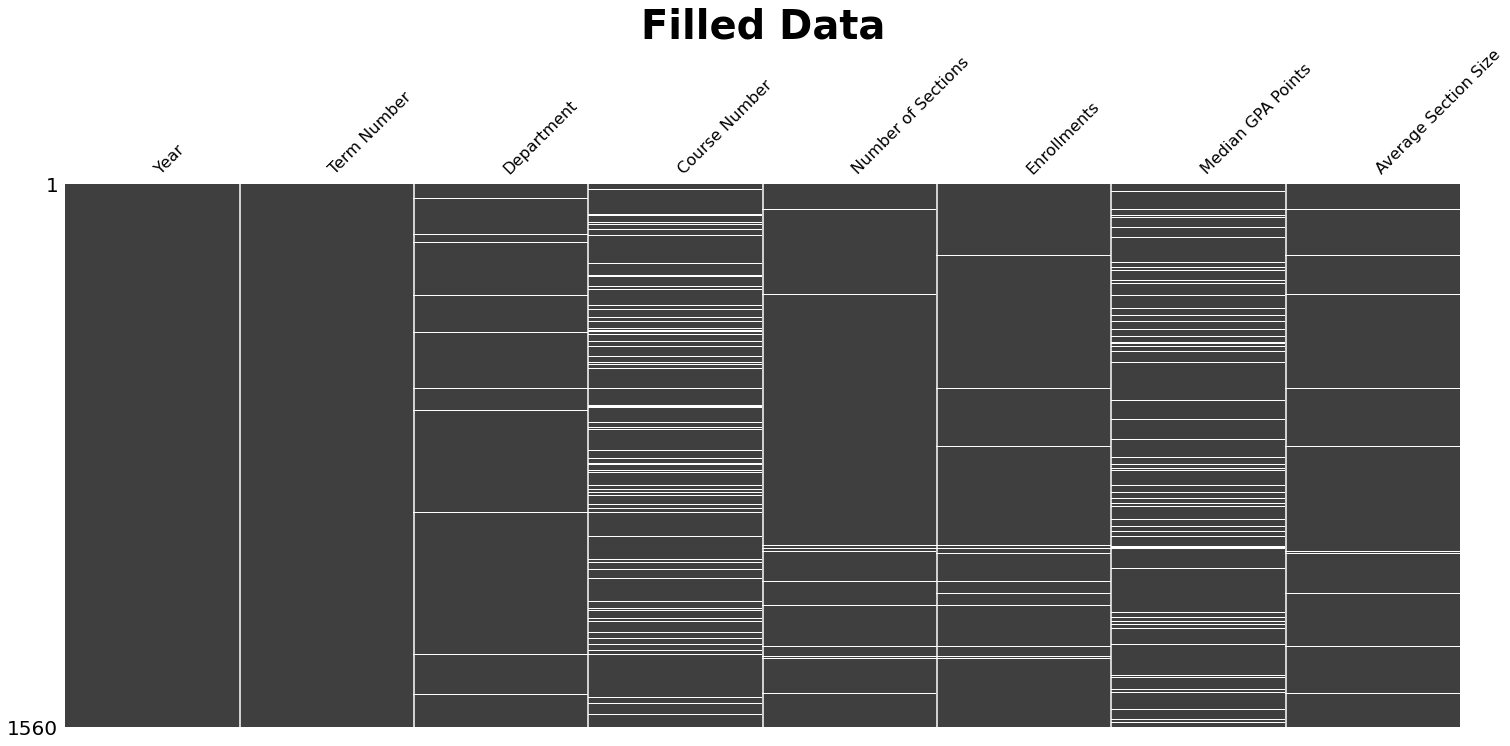

In [13]:
# observe missing value matrix of our unfilled dataset (same as above)
print("\n")
ax0 = msno.matrix(data, sparkline=False)
ax0.set_title("Unfilled Data", fontsize=40, fontweight='bold')
plt.show();

print("\n")

# observe missing value matrix of our FILLED dataset
ax1 = msno.matrix(filled_data, sparkline=False)
ax1.set_title("Filled Data", fontsize=40, fontweight='bold');

In [14]:
#compare the number of fully filled rows before and after interpolation
new_data = data.dropna()
new_filled_data = filled_data.dropna()
print("Size of original dataset, including rows with null values: " + str(len(data)))
print("Size of original dataset, minus rows with null values: " + str(len(new_data)))
print("Size of filled dataset, minus rows with null values: " + str(len(new_filled_data)))
print(str(len(new_filled_data) - len(new_data)), "new rows of data are now fully filled." ,
      str(len(data) - len(new_filled_data)) , "rows still contain missing data.")

Size of original dataset, including rows with null values: 1560
Size of original dataset, minus rows with null values: 670
Size of filled dataset, minus rows with null values: 1213
543 new rows of data are now fully filled. 347 rows still contain missing data.


Notice how much less white space (null values) we have in our dataset! 

## More Data Exploration

Let's now look at the R^2 correlations between *numerical* variables in our dataset - aka every variable except `Department`.

(1227, 8)


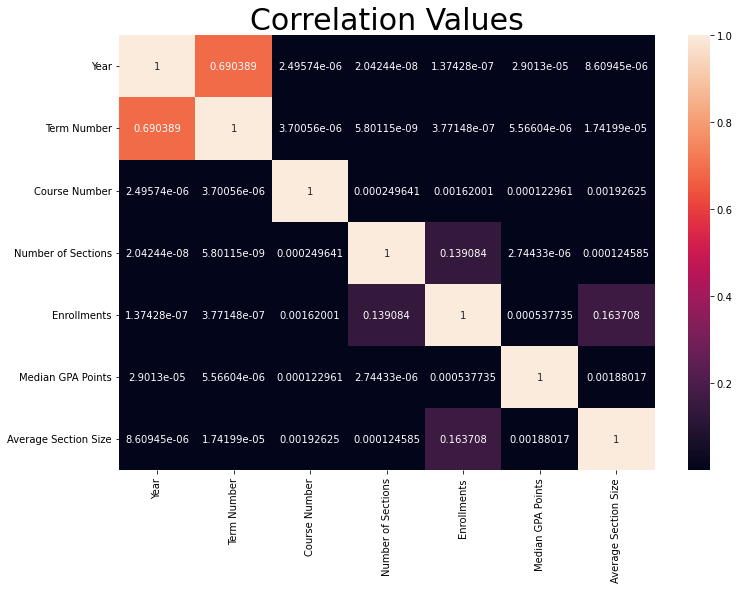

In [15]:
import seaborn as sn

df = filled_data.dropna(
        subset = ["Department", "Median GPA Points", "Course Number", "Average Section Size"])
print(df.shape)

#correlation matrix for bivariate regression between all numerical columns in df
corr_matrix = df.corr('pearson')**2

fig, ax = plt.subplots(figsize = (12,8))
ax = sn.heatmap(corr_matrix ** 2, annot=True, fmt='g')
ax.set_title("Correlation Values", fontsize=30)
plt.show()

Yikes. Our R<sup>2</sup> values for `Median GPA Points` are atrocious. It looks like `Course Number`, `Enrollments`, and `Average Section Size` have by far the highest correlation values, so I'm going to be using those in my regression. However, there is a high covariance between `Enrollments` and `Average Section Size`, so I would rather use only `Average Section Size`, to reduce standard error of our regression. Additionally, I'm also going to throw in the `Department` variable, because I think it could be very closely related to median GPA.

First, let's sort our dataset into training and testing sets. Then, let's encode `Departments` (convert it into numerical data).

In [16]:
# First, split into training and testing data
length = len(df)
bool_mask = np.ones(length)
bool_mask[:length//5] = 0  # set aside approx 10% of observations as testing data
np.random.shuffle(bool_mask)
bool_mask = bool_mask.astype(bool)
df['train'] = bool_mask

# To avoid errors, make sure each department appears at least once in the training dataset
train_idxs = []
for dept in list(np.unique((df["Department"]))):
    index = df[df['Department'] == dept].index[0]
    train_idxs.append(index)
df["train"][train_idxs] = True

df_train = df.loc[df['train'] == True]
df_test = df.loc[df['train']== False]

In [17]:
depts_unsorted = np.unique((df_train["Department"]))
gpa_unsorted = np.zeros(depts_unsorted.shape)
for i in range(len(depts_unsorted)):
    gpa_unsorted[i] = df_train.loc[df_train["Department"] == depts_unsorted[i], "Median GPA Points"].mean()

depts = depts_unsorted[np.argsort(gpa_unsorted)]
gpa = gpa_unsorted[np.argsort(gpa_unsorted)]

#manually fit a label encoder (couldn't get sklearn LabelEncoder to work the way I wanted)
#sort by average 
enc = dict(zip(depts, np.arange(len(gpa))))

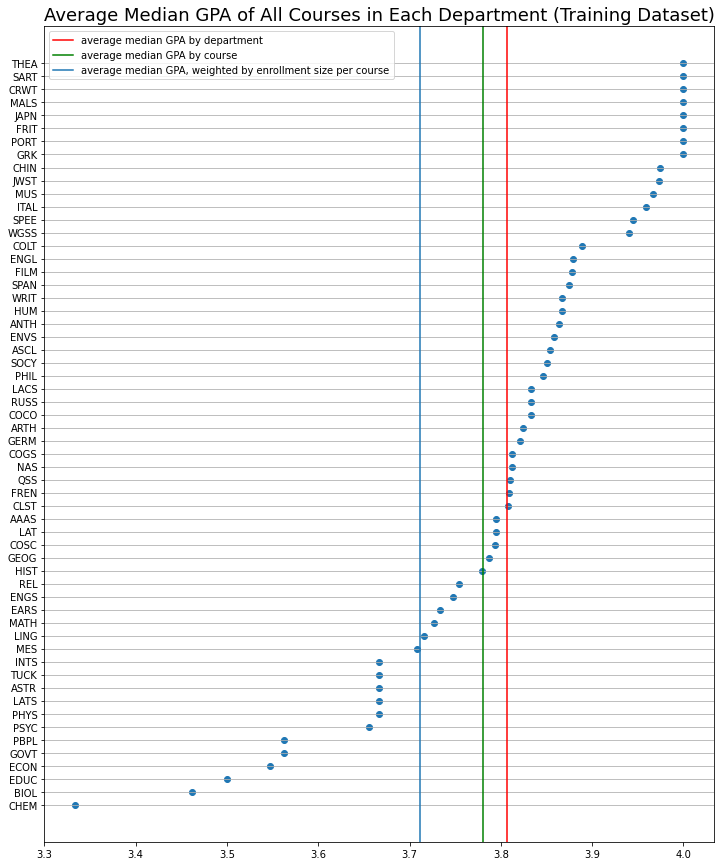

In [18]:
fig, ax = plt.subplots(figsize = (12, 15))
ax = plt.scatter(gpa, depts)
plt.grid(axis='y')
plt.axvline(x = gpa.mean(), c = 'Red', 
            label = 'average median GPA by department')  # average median GPA by department
plt.axvline(x = df_train['Median GPA Points'].mean(), c='Green', 
            label= 'average median GPA by course')  # average median GPA by course
plt.axvline(x = (df_train['Enrollments'] * df_train['Median GPA Points']).sum() / df_train['Enrollments'].sum(),
            label= 'average median GPA, weighted by enrollment size per course')  # the true average student's GPA
plt.legend(loc = "upper left")
plt.title("Average Median GPA of All Courses in Each Department (Training Dataset)", fontsize=18)
plt.show()

As expected, **Median GPA is correlated with department**.

I feel bad for chem/biol/astr students. science hard :(

## Finally, the actual model.

From the graph above, it seems like the relation GPA and department isn't actually linear. So rather than taking a linear regression of Median GPA on Department, it seems like a better idea to use either dummy variables or an isotonic regression. In this case, they actually end up giving the same result, and I chose to use an isotonic regression.

I will run two regressions: one with a simple linear regression on Department, and one with an isotonic regression. We'll see that the isotonic regression performs better.

In [19]:
int_depts = np.array([enc[i] for i in depts])

In [20]:
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

ireg = IsotonicRegression().fit(int_depts, gpa[int_depts])
lreg = LinearRegression().fit(int_depts.reshape(-1,1), gpa[int_depts])

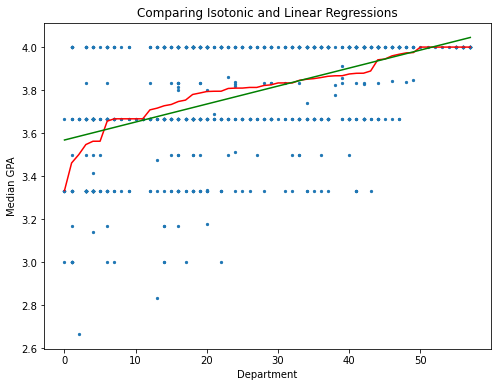

In [21]:
all_depts = np.array([enc[i] for i in df_train["Department"]])

x = np.linspace(0,57, 58)
y = ireg.predict(x)
ly = lreg.predict(x.reshape(-1,1))
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(all_depts, df_train["Median GPA Points"], s = 5)
ax.plot(x, y, color="red")
ax.plot(x, ly, color="green")
ax.set_xlabel("Department")
ax.set_ylabel("Median GPA")
plt.title("Comparing Isotonic and Linear Regressions")
plt.show()

Notice how the isotonic regression (red line) adheres more closely to the values it is trying to predict than the linear regression (green line). 

Let's do our actual multivariate model now. I will run two regressions: one is a linear regression on `Department`, `Course Number`, and `Average Section Size`. The second one is a two-stage regression: the first stage is an isotonic regression on `Department`, and the second stage is a linear regression on the first stage, in addition to `Course Number` and `Average Section Size`. We expect the second regression to perform better, for the reasons I just described above.

In [22]:
# train the first regression
features = np.hstack((all_depts.reshape(-1,1), np.asarray(df_train["Course Number"]).reshape(-1,1), np.asarray(df_train["Average Section Size"]).reshape(-1,1)))
lreg = LinearRegression().fit(features, np.asarray(df_train["Median GPA Points"]))

In [23]:
# train the second regression
features = np.hstack((ireg.predict(all_depts).reshape(-1,1), np.asarray(df_train["Course Number"]).reshape(-1,1), np.asarray(df_train["Average Section Size"]).reshape(-1,1)))
lreg2 = LinearRegression().fit(features, df_train["Median GPA Points"])

In [24]:
# predict the values for the testing data, using both regression models
# add prediction results to our dataset, along with mean squared error

df_test["2StagePred"] = lreg2.predict(np.hstack([ireg.predict(np.asarray([enc[i] for i in df_test["Department"]])).reshape(-1,1), np.asarray(df_test["Course Number"]).reshape(-1,1), np.asarray(df_test["Average Section Size"]).reshape(-1,1)]))
df_test["2SSquared Error"] = (df_test["2StagePred"] - df_test["Median GPA Points"])**2

df_test["1StagePred"] = lreg.predict(np.hstack([np.asarray([enc[i] for i in df_test["Department"]]).reshape(-1,1), np.asarray(df_test["Course Number"]).reshape(-1,1), np.asarray(df_test["Average Section Size"]).reshape(-1,1)]))
df_test["1SSquared Error"] = (df_test["1StagePred"] - df_test["Median GPA Points"])**2

In [25]:
df_test

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size,train,2StagePred,2SSquared Error,1StagePred,1SSquared Error
3,2021.0,3.0,AAAS,62.75,1.0,29.0,4.000000,29.0,False,3.821524,3.185370e-02,3.783705,0.046784
21,2021.0,3.0,CHEM,63.00,1.0,16.0,3.500000,16.0,False,3.390276,1.203931e-02,3.627774,0.016326
33,2021.0,3.0,COSC,56.00,1.0,36.0,3.666667,36.0,False,3.803914,1.883682e-02,3.750865,0.007089
34,2021.0,3.0,COSC,59.00,1.0,30.0,4.000000,30.0,False,3.814838,3.428498e-02,3.762410,0.056449
37,2021.0,3.0,EARS,40.00,1.0,27.0,4.000000,27.0,False,3.738949,6.814765e-02,3.706282,0.086270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,2022.0,2.0,THEA,27.00,1.0,14.0,4.000000,14.0,False,3.999681,1.020743e-07,4.042511,0.001807
1527,2022.0,2.0,THEA,48.00,1.0,14.0,4.000000,14.0,False,4.023104,5.337726e-04,4.065380,0.004274
1534,2022.0,2.0,WGSS,7.20,1.0,15.0,4.000000,15.0,False,3.918935,6.571538e-03,3.916668,0.006944
1542,2022.0,2.0,WGSS,53.07,1.0,24.0,4.000000,24.0,False,3.958731,1.703152e-03,3.954202,0.002097


In [26]:
mse2 = np.mean(df_test["2SSquared Error"])
mse1 = np.mean(df_test["1SSquared Error"])
print("MSE of single stage regression:", str(mse1))
print("MSE of two stage regression:", str(mse2))
print("MSE of two stage regression is " + str(mse1-mse2) + " better.")

MSE of single stage regression: 0.05487068254409854
MSE of two stage regression: 0.05028043771456718
MSE of two stage regression is 0.0045902448295313605 better.


In [27]:
SSR = np.sum(df_test["2SSquared Error"])
SST = np.sum((df_test["Median GPA Points"] - np.mean(df_test["Median GPA Points"])) ** 2)

print("R^2 value of two stage regression:", str(1 - SSR/SST))

R^2 value of two stage regression: 0.1874186136613889


### Wrapping Up

Admittedly, the R<sup>2</sup> value of our regression isn't amazing (I got .187, but the value will change each time you run it), but it is much much better than basic bivariate linear regression we could have done.
We can now take our model and use it to predict the median GPA of any course, given its department and course number, as well as its average section size (all information we can easily find!).

In [28]:
# as a reminder, here is the map of department name to its numerical code
enc

{'CHEM': 0,
 'BIOL': 1,
 'EDUC': 2,
 'ECON': 3,
 'GOVT': 4,
 'PBPL': 5,
 'PSYC': 6,
 'PHYS': 7,
 'LATS': 8,
 'ASTR': 9,
 'TUCK': 10,
 'INTS': 11,
 'MES': 12,
 'LING': 13,
 'MATH': 14,
 'EARS': 15,
 'ENGS': 16,
 'REL': 17,
 'HIST': 18,
 'GEOG': 19,
 'COSC': 20,
 'LAT': 21,
 'AAAS': 22,
 'CLST': 23,
 'FREN': 24,
 'QSS': 25,
 'NAS': 26,
 'COGS': 27,
 'GERM': 28,
 'ARTH': 29,
 'COCO': 30,
 'RUSS': 31,
 'LACS': 32,
 'PHIL': 33,
 'SOCY': 34,
 'ASCL': 35,
 'ENVS': 36,
 'ANTH': 37,
 'HUM': 38,
 'WRIT': 39,
 'SPAN': 40,
 'FILM': 41,
 'ENGL': 42,
 'COLT': 43,
 'WGSS': 44,
 'SPEE': 45,
 'ITAL': 46,
 'MUS': 47,
 'JWST': 48,
 'CHIN': 49,
 'GRK': 50,
 'PORT': 51,
 'FRIT': 52,
 'JAPN': 53,
 'MALS': 54,
 'CRWT': 55,
 'SART': 56,
 'THEA': 57}

In [29]:
# Let's predict the median GPA of COSC 54.09, given that it has an average section size of 22
lreg2.predict(np.array([[ireg.predict([36]), 54.09, 22]]))

array([3.88229807])